In [ ]:
import pandas as pd
import numpy as np

# Load the Excel file (adjust path based on what os.walk prints)
df = pd.read_excel('FinalApartments_data.csv')

# Show basic info
df.head()


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_type,square_feet,cityname,state,latitude,longitude,source,time,state_name,datetime
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",Not Specified,1.0,1,USD,No,Thumbnail,...,Monthly,542,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355,California,2019-12-26 11:39:15
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",Not Specified,1.5,3,USD,No,Thumbnail,...,Monthly,1500,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340,Virginia,2019-12-26 11:39:00
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,Not Specified,2.0,3,USD,No,Thumbnail,...,Monthly,1650,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332,North Carolina,2019-12-26 11:38:52
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",Not Specified,1.0,2,USD,No,Thumbnail,...,Monthly,820,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330,California,2019-12-26 11:38:50
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",Not Specified,1.0,1,USD,No,Thumbnail,...,Monthly,624,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308,New Mexico,2019-12-26 11:38:28


In [ ]:
# Convert price to 3-tier classification: Low / Medium / High
df['price_category'] = pd.qcut(df['price'], q=3, labels=['Low', 'Medium', 'High'])

df['price_category'].value_counts()

df['room_density'] = (df['bedrooms'] + df['bathrooms']) / df['square_feet']


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

numerical_features = ['bedrooms', 'bathrooms', 'square_feet', 'room_density']
categorical_features = ['cityname', 'state_name', 'fee', 'pets_allowed', 'price_type']

X = df[numerical_features + categorical_features]
y = df['price_category']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' 
)

X_transformed = preprocessor.fit_transform(X)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train RF model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict & evaluate
y_pred_rf = rf.predict(X_test)

print("🔹 Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

🔹 Random Forest Classification Report:
               precision    recall  f1-score   support

        High       0.85      0.85      0.85      6703
         Low       0.83      0.84      0.84      6560
      Medium       0.73      0.72      0.73      6558

    accuracy                           0.81     19821
   macro avg       0.80      0.80      0.80     19821
weighted avg       0.80      0.81      0.80     19821

🔹 Confusion Matrix:
 [[5708  143  852]
 [ 166 5519  875]
 [ 867  961 4730]]


In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train a single decision tree
dt = DecisionTreeClassifier(max_depth=4, random_state=42)  # limit depth for readability
dt.fit(X_train, y_train)

# Predict & evaluate
y_pred_dt = dt.predict(X_test)

print("🔸 Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
print("🔸 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

🔸 Decision Tree Classification Report:
               precision    recall  f1-score   support

        High       0.77      0.45      0.57      6703
         Low       0.52      0.83      0.64      6560
      Medium       0.42      0.34      0.38      6558

    accuracy                           0.54     19821
   macro avg       0.57      0.54      0.53     19821
weighted avg       0.57      0.54      0.53     19821

🔸 Confusion Matrix:
 [[3037 1518 2148]
 [ 189 5449  922]
 [ 727 3578 2253]]


/var/folders/z_/p0wf4rln5dg7r1_ltxkn5bkr0000gn/T/ipykernel_67635/4134395271.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importances, y=top_features, palette='viridis')


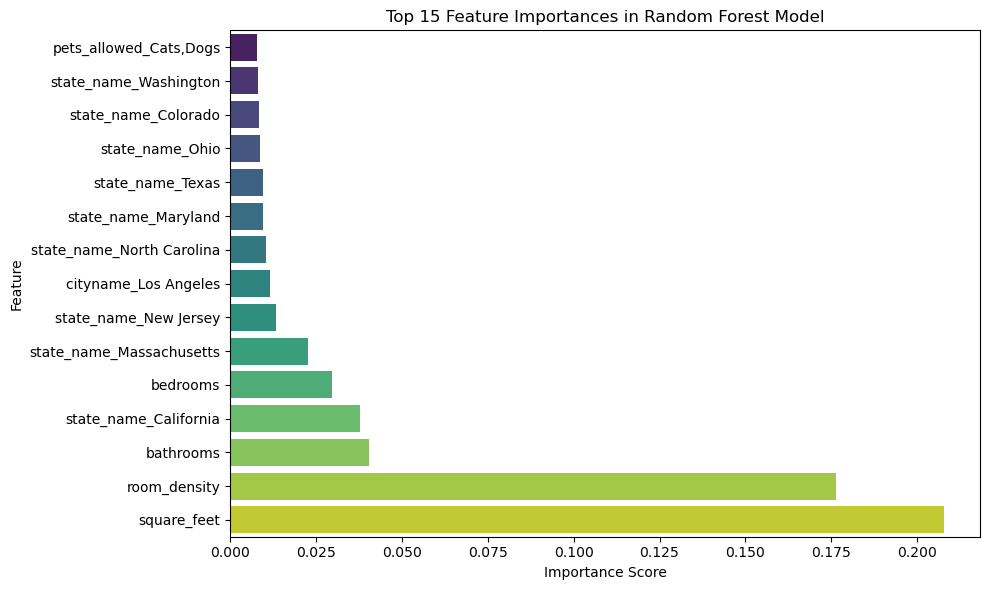

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sort importances
top_n = 15
indices = np.argsort(importances)[-top_n:]
top_features = [all_feature_names[i] for i in indices]
top_importances = importances[indices]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_importances, y=top_features, palette='viridis')
plt.title("Top 15 Feature Importances in Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

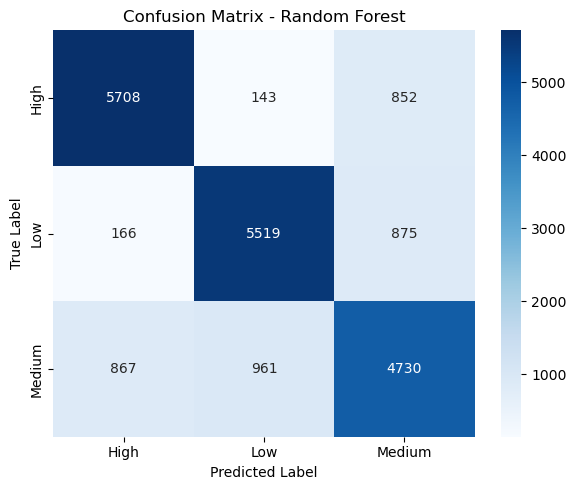

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

/var/folders/z_/p0wf4rln5dg7r1_ltxkn5bkr0000gn/T/ipykernel_67635/3964319020.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()), palette='coolwarm')


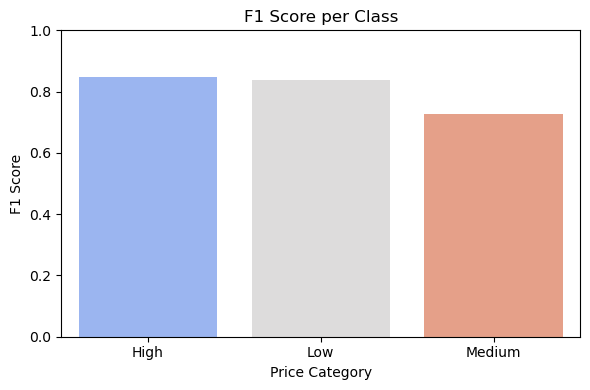

In [10]:
from sklearn.metrics import classification_report

report_dict = classification_report(y_test, y_pred_rf, output_dict=True)
f1_scores = {label: metrics['f1-score'] for label, metrics in report_dict.items() if label in rf.classes_}

plt.figure(figsize=(6, 4))
sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()), palette='coolwarm')
plt.title("F1 Score per Class")
plt.xlabel("Price Category")
plt.ylabel("F1 Score")
plt.ylim(0, 1.0)
plt.tight_layout()
plt.show()

/var/folders/z_/p0wf4rln5dg7r1_ltxkn5bkr0000gn/T/ipykernel_67635/2161601592.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='price_category', y='price', palette='Set2')


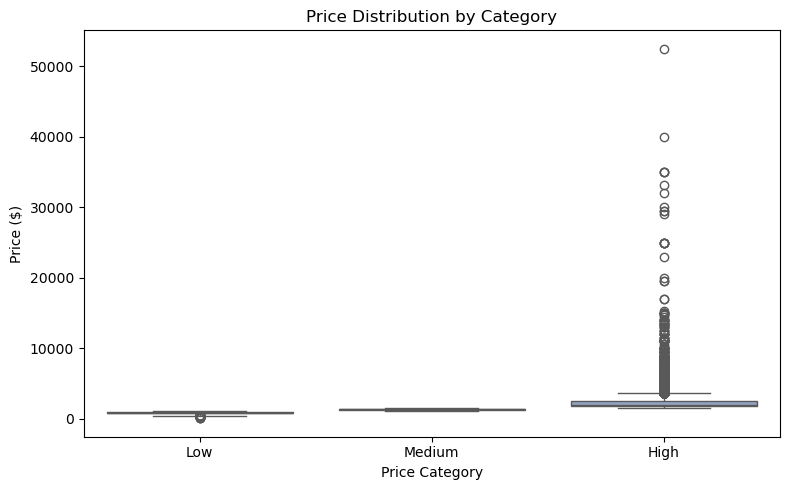

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='price_category', y='price', palette='Set2')
plt.title("Price Distribution by Category")
plt.ylabel("Price ($)")
plt.xlabel("Price Category")
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import time

print("🔍 Feature shape:", X_transformed.shape)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

start = time.time()

rf_model = RandomForestClassifier(n_estimators=30, random_state=42, n_jobs=-1)
rf_cv_scores = cross_val_score(rf_model, X_transformed, y, cv=skf, scoring='accuracy')

print("\n🔹 Random Forest CV Accuracy Scores:", rf_cv_scores)
print("🔹 RF Mean Accuracy: {:.4f} | Std Dev: {:.4f}".format(np.mean(rf_cv_scores), np.std(rf_cv_scores)))

dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_cv_scores = cross_val_score(dt_model, X_transformed, y, cv=skf, scoring='accuracy')

print("\n🔸 Decision Tree CV Accuracy Scores:", dt_cv_scores)
print("🔸 DT Mean Accuracy: {:.4f} | Std Dev: {:.4f}".format(np.mean(dt_cv_scores), np.std(dt_cv_scores)))

end = time.time()
print(f"\n⏱️ Total Runtime: {end - start:.2f} seconds")
print(X_transformed.shape, type(X_transformed))

🔍 Feature shape: (99105, 3043)

🔹 Random Forest CV Accuracy Scores: [0.80162454 0.80273447 0.81292568 0.80066596 0.80142273]
🔹 RF Mean Accuracy: 0.8039 | Std Dev: 0.0046

🔸 Decision Tree CV Accuracy Scores: [0.546592   0.54275768 0.54588568 0.54452349 0.54462439]
🔸 DT Mean Accuracy: 0.5449 | Std Dev: 0.0013

⏱️ Total Runtime: 35.98 seconds
(99105, 3043) <class 'scipy.sparse._csr.csr_matrix'>


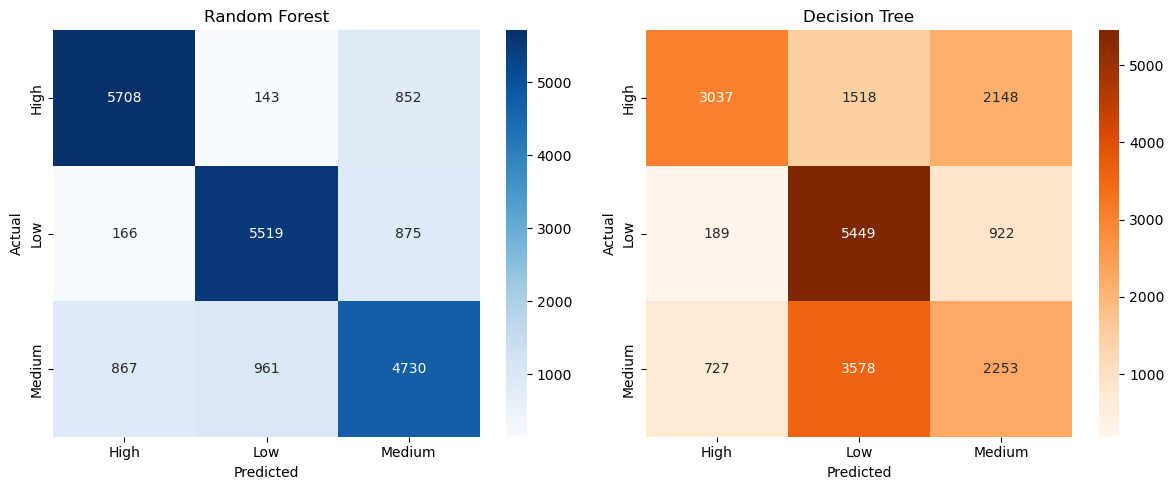

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=rf.classes_)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf.classes_, yticklabels=rf.classes_, ax=axes[0])
axes[0].set_title('Random Forest')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges',
            xticklabels=rf.classes_, yticklabels=rf.classes_, ax=axes[1])
axes[1].set_title('Decision Tree')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


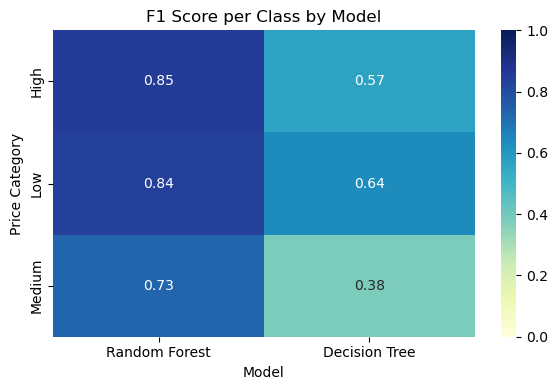

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
dt_report = classification_report(y_test, y_pred_dt, output_dict=True)

f1_df = pd.DataFrame({
    "Random Forest": {label: rf_report[label]["f1-score"] for label in rf.classes_},
    "Decision Tree": {label: dt_report[label]["f1-score"] for label in rf.classes_}
})

plt.figure(figsize=(6, 4))
sns.heatmap(f1_df, annot=True, fmt=".2f", cmap="YlGnBu", vmin=0, vmax=1)
plt.title("F1 Score per Class by Model")
plt.xlabel("Model")
plt.ylabel("Price Category")
plt.tight_layout()
plt.show()

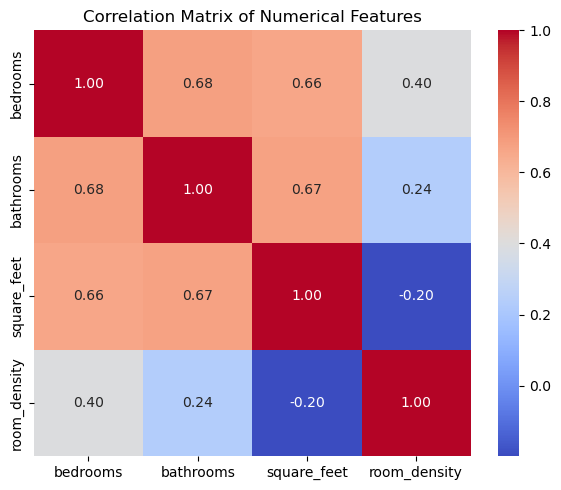

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_num = df[numerical_features]

corr_matrix = df_num.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()